In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('data for categorical.csv')

In [2]:
df.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


In [4]:
new_df=df[['GarageQual','FireplaceQu','SalePrice']]

In [5]:
new_df.head(2)

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500


In [8]:
new_df.isnull().sum()

GarageQual      81
FireplaceQu    690
SalePrice        0
dtype: int64

In [10]:
new_df.isnull().mean()*100

GarageQual      5.547945
FireplaceQu    47.260274
SalePrice       0.000000
dtype: float64

In [11]:
new_df['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [12]:
new_df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

<ipython-input-16-7c7f928041cd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['GarageQual'].fillna('TA', inplace=True)


<Axes: xlabel='GarageQual'>

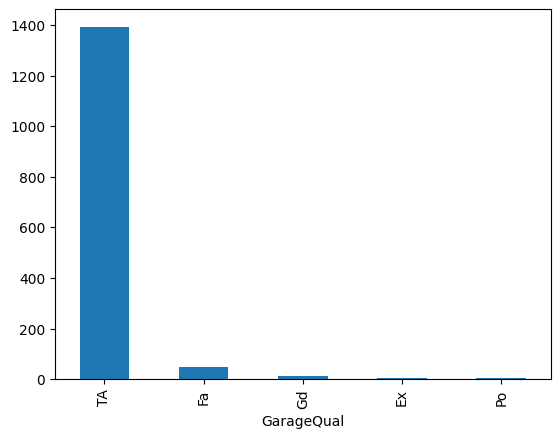

In [16]:

temp = new_df [new_df['GarageQual']=='TA']['SalePrice']
new_df['GarageQual'].fillna('TA', inplace=True)
new_df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

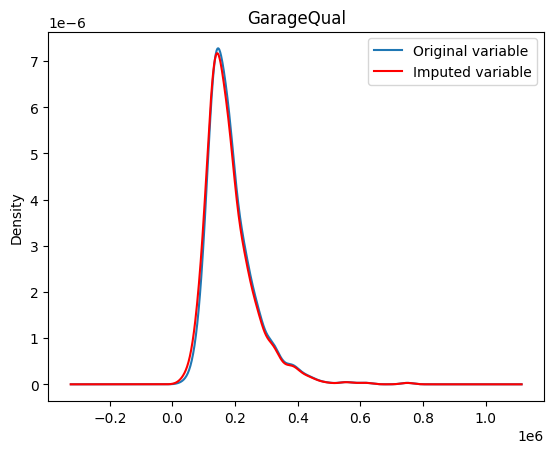

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
new_df[new_df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('GarageQual')

In [20]:
new_df['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [23]:
new_df['FireplaceQu'].mode()

0    Gd
Name: FireplaceQu, dtype: object

Text(0.5, 1.0, 'FireplaceQu')

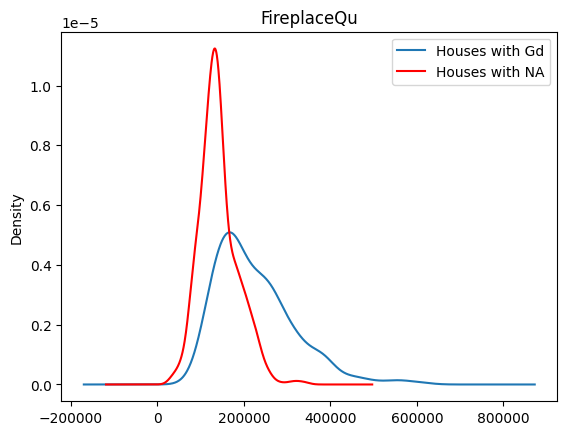

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

new_df[new_df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

new_df[new_df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

<Axes: xlabel='FireplaceQu'>

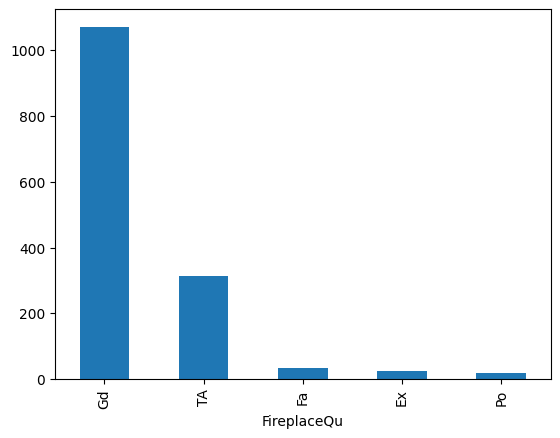

In [26]:
temp=new_df[new_df['FireplaceQu']=='Gd']['SalePrice']
new_df['FireplaceQu'].fillna('Gd', inplace=True)
new_df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

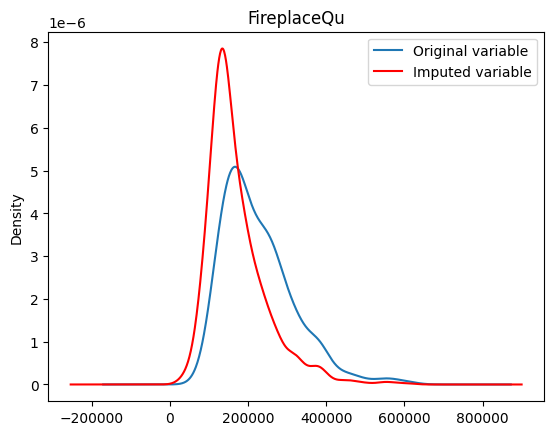

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
new_df[new_df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

In [30]:
new_df.head(2)

,GarageQual,FireplaceQu,SalePrice
0,TA,Gd,208500
1,TA,TA,181500


Using sklearn


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
x=new_df.drop(columns=['SalePrice'])
y=new_df['SalePrice']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [36]:
imputer=SimpleImputer(strategy='most_frequent')
x_train=imputer.fit_transform(x_train)
x_test=imputer.transform(x_test)

In [37]:
imputer.statistics_

array(['TA', 'Gd'], dtype=object)